<a href="https://colab.research.google.com/github/guillaumeovf/CarLoanDefault/blob/main/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#### Here is the script to get the data directly from kaggle through colab

!pip install -q kaggle
from google.colab import files
files.upload()
#create a kaggle folder
!mkdir ~/.kaggle

# Go on kaggle > Account > Create New API token
# Save the json file in your laptop in a dedicated folder

# copy the kaggle.json to folder created
!cp kaggle.json ~/.kaggle
#permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json

# Datasets available here: 
# https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
!kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009
!unzip red-wine-quality-cortez-et-al-2009.zip

#### End of the script to get the data directly from kaggle through colab
# Remember that when you run it, you have to click on the button Choose Files and 
# then select the kaggle.json file from your computer

Saving kaggle.json to kaggle.json
  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 20.7MB/s]
Archive:  red-wine-quality-cortez-et-al-2009.zip
  inflating: winequality-red.csv     


In [ ]:
##### Python as a programming language basics

# The usage of the hashtag represents a comment. everything on the same line and after
# will be not take into account

# If you execute the content of a cell, only the last element will be displayed
7+3
7-3
7*3
21/2
21//2 # floor division
21%2 # modulo
21**2 # exponential

441

In [ ]:
# You will always want to associate a number / a result to a variable:
gg=2 #It means that now, Python knows that the value of gg is 2
gg==3 #Here, '==' means: Does gg is equal to 3 ? Given that you created a variable just before saying 
# that gg equals 2, Python answers that it is False because 3 is different than 2
# However if you write gg==2, Python will reply "True"
# Given that you defined the variable gg, if you gg Python will display the value 2.

False

In [ ]:
# Note that you can change the value of gg by defining again the variable gg:
gg=3
# Instead of asking Python if a variable is equals to a value, you can use inequalities:
gg<=3
gg>=3
gg>3

False

In [ ]:
# When you define a variable, it is case sensitive. It means that the 4 names below represent 
# 4 different names
beautiful_variable = 3
Beautiful_variable = 4
BEAUTIFUL_VARIABLE = 5
BeaUtIfUL_vaRiABLe = 6

In [ ]:
# It exists several data types in Python the most common & used is the list
# A list is defined by elements in [] The elements can be both numeric or textual

cities = ['Paris', 'Zurich', 'Rome', 'Berlin', 'London']

# A list is 0 based in term of index which means that the first element of the list (Paris) is the element 0
print(cities[0])
# You can access the element by the end:
print(cities[-1])

# You can modify a list. Here you want to modify the third element (Rome) by Milan:
cities[2] = 'Milan'
print(cities)

# In order to insert an element in a list: list.insert(1, element)
# To insert HK between Zurich & Milan
cities.insert(2, 'HK')
print(cities)

# In order to add an element at the end of the list:
cities.append('Rio')
print(cities)

# In order to remove an element from the list:
cities.remove('Paris')
print(cities)

# In this list we only have textual elements, we can add some numerical one:
cities.insert(2, 848)
print(cities)
cities.append(848)
print(cities)
# You can see that we have 2 values of 848 in our list. The remove function only remove the 
# first time Python see the value:
cities.remove(848)
print(cities)
# We will see later how to delete all the values 848.

# If you want to access the index (= the position) of an element in the list:
print(cities.index("HK"))

# If you want to concatenate 2 lists:
new_list = [1, 3, 5, 2]
cities = cities + new_list
print(cities)

# There are other types than list, such as tuple & dictionnary.
# Keep in mind that list are defined by [], if you use (), it will be a tuple.

Paris
London
['Paris', 'Zurich', 'Milan', 'Berlin', 'London']
['Paris', 'Zurich', 'HK', 'Milan', 'Berlin', 'London']
['Paris', 'Zurich', 'HK', 'Milan', 'Berlin', 'London', 'Rio']
['Zurich', 'HK', 'Milan', 'Berlin', 'London', 'Rio']
['Zurich', 'HK', 848, 'Milan', 'Berlin', 'London', 'Rio']
['Zurich', 'HK', 848, 'Milan', 'Berlin', 'London', 'Rio', 848]
['Zurich', 'HK', 'Milan', 'Berlin', 'London', 'Rio', 848]
1
['Zurich', 'HK', 'Milan', 'Berlin', 'London', 'Rio', 848, 1, 3, 5, 2]


In [ ]:
### Conditional statements:
# The global idea is to do an action based on a current state
val = 0 # Here the current state is that the variable val has the value 0
if val > 0:
  print('The value is positive')
elif val < 0:
  print('The value is negative')
elif val<-10:
  print('very low')
else:
  print('The value equals 0')

# It is very important to understand the chain, on the previous example, if you replace val=0 by 
# val = -12, the statement will return 'The value is negative' because it fits the condition val<0.
# You have to switch val < 0 and val <-10 like this:
val=0
if val > 0:
  print('The value is positive')
elif val < -10:
  print('The value is very low')
elif val<0:
  print('The value is negative')
else:
  print('The value equals 0')

# Be careful, the indentation is important !!!

# Logical expressions for if:
# a == b: is a equal to b
# a != b: is a different from b
# a <= b: is a lower or equal than b
# a >= b: is a greater or equal than b
# a < b: is a strictly lower than b
# a > b: is a strictly greater than b
# a is b: is a the same object as b
# condition_a and condition_b: logical AND
# condition_a or condition_b: logical OR
# not: negation

if 7 not in [0, 1, 2, 3, 4]:
  print('Indeed')

# Of course, in the real life, you will do more advanced condition that just display a print after a condition.

The value equals 0
The value equals 0
Indeed


In [ ]:
### Loop
# while loop: loop until the condition happened -> can run to the infinity
# Ex while loop
N=15
total = 0
counter = 1
while counter <= N:
  total += counter # total = total+counter
  counter += 1
  print(total)



# for loop (most used): loop on all the defined elements of an object.
# Ex for loop
fruits = ['apple', 'pear', 'cherry']
for i in fruits:
  print(i)

# It is as well possible to do a loop within a loop (a nested loop):
list_of_list = [['a', 'b', 'c'], [1, 2, 3]]
for sub_list in list_of_list:
  print("We treat the list: ", sub_list)
  for element in sub_list:
    print('We display the element: ', element)



1
3
6
10
15
21
28
36
45
55
66
78
91
105
120
apple
pear
cherry
We treat the list:  ['a', 'b', 'c']
We display the element:  a
We display the element:  b
We display the element:  c
We treat the list:  [1, 2, 3]
We display the element:  1
We display the element:  2
We display the element:  3


In [ ]:
### Functions
# Obj: automate an action composed by several instructions
# The keyword def introduces the definition of a function
# It is followed by the name of the function and a series of parameters in parenthesis
# It is possible to define a function without entry parameters
# The instructions constituing the body of the function starts at the next line and must have an identation
# Instruction return causes the function to be removes by returning a value. Return without expression gives None

def area(length, width):
  ''' Function calculating the area of a rectangle
  Parameters:
  length: TYPE float
    Measure of the length of a rectangle
  width: TYPE float
    Measure the width of a rectangle

  Return:
    area: TYPE float
  '''
  my_area = length * width

  return my_area

area(11,4)

# Within a function, we can put all kind of instructions, create all kind of objects
# Note that the content within the 3 apostrophies is a second way to write some comments.
# It is a good practice in order to describe a function.

44

In [ ]:
# To close the chapter on Python basics, there is another way to write a for loop
# We will use it in order to delete all the element of a list having a particular value:
last_list = [0, 1, 2, 3, 4, 5, 888, 6, 7, 888, 8, 888, 9] # Let's delete all the 888

valueToBeRemoved = 888
last_list = [value for value in last_list if value != valueToBeRemoved] 
#of course, you can replace 'value' by what you want, it is the equivalent of i
print(last_list)


###
### End of Python Basics

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [2]:
### Start of pandas and numpy
import pandas as pd # Here I import a library named pandas which is specialized in
# data manipulation. I give an alias pd it is a kind of pseudonyme where pd refers to pandas.
import numpy as np
df = pd.read_csv('/content/winequality-red.csv')
# Here I use the function read_csv from the pandas package and I assign it to a database named df.
# There is a lot of possible parameters in the read_csv function: Always check the documentation.
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

# Here df is a database, I will call it as well a dataframe


In [ ]:
# You can have a look on the first lines:
df.head() #You can specify a number in the parenthesis in order to see a specific number of lines
df.tail() # It shows the last lines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
# List of useful functions to have general overview on the dataframe:
df.dtypes # To see the type of each feature
df.describe() # To have some descriptive statistics
df.info() # Same as dtypes + more information such as the number of non missing values
df.shape # In order to have the number of lines and columns of the dataframe
len(df) # In order to have the number of lines


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


1599

In [ ]:
### Now let's do some data manipulation
# Select a column:
df['fixed acidity'].head(2) # If you select 1 feature: dataframe['name_feature']
# Select multiple columns
df[['fixed acidity', 'volatile acidity']].head(2) 
# If you select 2 or more features: dataframe[['feature1', 'feature2']]

,fixed acidity,volatile acidity
0,7.4,0.70
1,7.8,0.88


In [ ]:
# Now, let's do some filters -> select lines from a condition
mask1 = df['fixed acidity'] >7 # As we saw in the Python basics part, df['fixed acidity'] >7
# refers to a question, does the value (here, each line) is >7 ; True or False
# You can display mask1 to see how it is composed, you will see it is a list of boolean.
df[mask1].min() # Then, we integreate the list of boulean in: dataframe[list_boolean]
# The output is only composed by values >7 that we can check with the .min() function.

# You are not obliged to create a mask, you can directly write the condition within:
df[df['fixed acidity'] >7]

# You can check that indeed the output are exactly the same:
df[mask1] == df[df['fixed acidity'] >7]

# If you want to select a part of the population between 2 values:
mask2 = df['fixed acidity'].between(7,8)
# https://pandas.pydata.org/docs/reference/api/pandas.Series.between.html

df[mask2].min()
df[mask2]['fixed acidity'].min()
df[mask2][['fixed acidity', 'density']].min()

# If you want to do several conditions, the '&' means 'and' ; the '|' means 'or'

# Here I want the residual sugars <= 1.9 or >= 2.3 , and sulphates < 0.7301
mask3 = (((df['residual sugar'] >= 2.3) | (df['residual sugar'] <= 1.9)) & (df['sulphates'] < 0.7301))
df[mask3].describe()

# Keep in mind, you have to associate line of script to a variable/object however it
# is not saved in memory
len(df)
df2 = df[mask3]
len(df2)

893

In [ ]:
# Here I create a function having the name citric_acid_cat with the parameter x
# In the function, x will pass within a conditional statement. Given the value,
# it will return a letter (a category):
def citric_acid_cat(x):
  if x < 0.21 :
    return 'A'
  elif x < 0.3 :
    return 'B'
  else:
    return 'C'

# Now we want to create a new feature citric_cat, which transform the numerical value
# of citric acid to the category defined above for each line of the feature.
# We could create a for loop. However the apply lambda is more efficient from a computing point of view 
# The x refers to the x of the function which is df['citric acid']
df['citric_cat'] = df['citric acid'].apply(lambda x: citric_acid_cat(x))

In [ ]:
# When you do a mask, it is not only on numerical features but as well on categoricals:
mask5 = (((df['residual sugar'] >= 2.3) | (df['residual sugar'] <= 1.9)) & (df['sulphates'] < 0.7301) & (df['citric_cat'] == 'A'))
df[mask5]
# On this example, I want to focus only on the category A so it is quick to write.
# However it is not always the case and you can filter through a list:

list_cat_to_keep = ['A', 'C']
mask6 = (((df['residual sugar'] >= 2.3) | (df['residual sugar'] <= 1.9)) & (df['sulphates'] < 0.7301) & (df['citric_cat'].isin(list_cat_to_keep)))
df[mask6]
# dataframe['feature'].isin(list_specified) creates the list (the pandas Series to be precise) of boolean

# To finish, you could want all the element of a feature execpt those that you specify in a list.
# Let's say, you want to analyse all the citri_cat that are not in the list (here the cat=B)
# You can use: ~dataframe['feature'].isin(list_specified) // The '~' means not isin:
mask7 = (((df['residual sugar'] >= 2.3) | (df['residual sugar'] <= 1.9)) & (df['sulphates'] < 0.7301) & (~df['citric_cat'].isin(list_cat_to_keep)))
df[mask7] #As you see, you only have the category 'B' of citric_cat.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,citric_cat
26,7.6,0.41,0.24,1.8,0.080,4.0,11.0,0.99620,3.28,0.59,9.500000,5,B
34,5.2,0.32,0.25,1.8,0.103,13.0,50.0,0.99570,3.38,0.55,9.200000,5,B
48,6.4,0.40,0.23,1.6,0.066,5.0,12.0,0.99580,3.34,0.56,9.200000,5,B
72,7.7,0.69,0.22,1.9,0.084,18.0,94.0,0.99610,3.31,0.48,9.500000,5,B
87,7.7,0.49,0.26,1.9,0.062,9.0,31.0,0.99660,3.39,0.64,9.600000,5,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,7.7,0.54,0.26,1.9,0.089,23.0,147.0,0.99636,3.26,0.59,9.700000,5,B
1496,7.7,0.54,0.26,1.9,0.089,23.0,147.0,0.99636,3.26,0.59,9.700000,5,B
1501,7.8,0.82,0.29,4.3,0.083,21.0,64.0,0.99642,3.16,0.53,9.400000,5,B
1514,6.9,0.84,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333,6,B


In [ ]:
# Conditions, loops and functions
val=0
if val > 0:
  print('The value is positive')
elif val < 0:
  print('The value is negative')
else:
  print('The value equals 0')

# Logical expressions for if:
# a == b: is a equal to b
# a != b: is a different from b
# a <= b: is a lower or equal than b
# a >= b: is a greater or equal than b
# a < b: is a strictly lower than b
# a > b: is a strictly greater than b
# a is b: is a the same object as b
# condition_a and condition_b: logical AND
# condition_a or condition_b: logical OR
# not: negation

if 7 not in [0, 1, 2, 3, 4]:
  print('Indeed')

# while loop: loop until the condition happened -> can run to the infinity
# for loop: loop with fixed number of time

# Ex: while loop
N=15
total = 0
counter = 1
while counter <= N:
  total += counter # total = total+counter
  counter += 1
  print(total)

print(total)

# Ex: for loop -> Be careful of the indentation
fruits = ['apple', 'pear', 'cherry']
for i in fruits:
  print(i)

# Nested loop: a loop within a loop
list_of_list = [['a', 'b', 'c'], [1, 2, 3]]
for sub_list in list_of_list:
  print("We treat the list: ", sub_list)
  for element in sub_list:
    print('We display the element: ', element)

# Functions:
# Obj: automate an action composed by several instructions
# The keyword def introduces the definition of a function
# It is followed by the name of the function and a series of parameters in parenthesis
# It is possible to define a function without entry parameters
# The instructions constituing the body of the function starts at the next line and must have an identation
# Instruction return causes the function to be removes by returning a value. Return without expression gives None
def area(length, width):
  ''' Function calculating the area of a rectangle
  Parameters:
  length: TYPE float
    Measure of the length of a rectangle
  width: TYPE float
    Measure the width of a rectangle

  Return:
    area: TYPE float
  '''
  my_area = length * width

  return my_area

area(11,4)

# Within a function, we can put all kind of instructions, create all kind of objects

The value equals 0
Indeed
1
3
6
10
15
21
28
36
45
55
66
78
91
105
120
120
apple
pear
cherry
We treat the list:  ['a', 'b', 'c']
We display the element:  a
We display the element:  b
We display the element:  c
We treat the list:  [1, 2, 3]
We display the element:  1
We display the element:  2
We display the element:  3


44

In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/winequality-red.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.tail(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
df.dtypes
df.describe()
df.info()
df.shape
len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


1599

In [6]:
# Select a column
df['fixed acidity'].head(2)

# Select multiple columns
df[['fixed acidity', 'volatile acidity']].head(2)

# Filter by row:
mask1 = df['fixed acidity'] >7
df[mask1].min()

df[mask1] == df[df['fixed acidity'] >7]

mask2 = df['fixed acidity'].between(7,8)
# https://pandas.pydata.org/docs/reference/api/pandas.Series.between.html

df[mask2].min()
df[mask2]['fixed acidity'].min()
df[mask2][['fixed acidity', 'density']].min()


mask3 = (((df['residual sugar'] >= 2.3) | (df['residual sugar'] <= 1.9)) & (df['sulphates'] < 0.7301))
df[mask3].describe()

len(df) # We need to associate our work to an object. however, it is not saved in memory

1599

In [7]:
def citric_acid_cat(x):
  if x < 0.21 :
    return 'A'
  elif x < 0.3 :
    return 'B'
  else:
    return 'C'

df['citric_cat'] = df['citric acid'].apply(lambda x: citric_acid_cat(x))

In [8]:
mask5 = (((df['residual sugar'] >= 2.3) | (df['residual sugar'] <= 1.9)) & (df['sulphates'] < 0.7301) & (df['citric_cat'] == 'A'))
df[mask5]


list_cat_to_keep = ['A', 'C']
mask6 = (((df['residual sugar'] >= 2.3) | (df['residual sugar'] <= 1.9)) & (df['sulphates'] < 0.7301) & (df['citric_cat'].isin(list_cat_to_keep)))
df[mask6]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,citric_cat
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,A
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,A
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,A
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,C
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5,A
1587,5.8,0.610,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6,A
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5,A
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6,A


In [9]:
# Now let's complexify the database in order to have additional work to do later! Not important to understand
# Educational purpose

# Here I create a binary feature who will be used as target
# We use the numpy.where function which is equivalent to a if-then-else statement
# If df['quality'] >= 7 then df['Y']=1, else df['Y']=0
df['Y'] = np.where(df['quality']>= 7, 1, 0)

# We create as well some binary features of 'fixed acidity' & 'volatile acidity'
df['fixed_acidity_cat'] = np.where(df['fixed acidity']<= 8, 0, 1)
df['volatile_acidity_cat'] = np.where(df['volatile acidity']>= 0.4, 0, 1)

# Here I create some duplicates rows: I do a random sample of df and then I concat them at the end of df
temp = df.sample(n=150, random_state=893717398)
df = df.append(temp)
del(temp)
df.reset_index(drop=True, inplace=True)

# Here I create a new feature pH2 from pH where I had some missing values
df['pH2'] = np.where(df['pH'].index %15 ==0, np.nan, df['pH'])

# Here I create a new random feature 'acidity_other' from 'fixed acidity' and I create some missing values
rng = np.random.default_rng(893717398)
df = df.join(pd.Series(rng.normal(df['fixed acidity'].median(),1,len(df)), name='acidity_other'))
df['acidity_other'] = np.where(df['acidity_other'].index %2 !=0, np.nan, df['pH'])

#Here it is a function that will automatically create a feature of random dates between a defined interval
def random_datetimes_or_dates(start, end, out_format='datetime', n=10): 

    '''   
    unix timestamp is in ns by default. 
    I divide the unix time value by 10**9 to make it seconds 
    (or 24*60*60*10**9 to make it days).
    The corresponding unit variable is passed to 
    the pd.to_datetime function. 
    Values for the (divide_by, unit) pair to select is defined by 
    the out_format parameter.
    for 1 -> out_format='datetime'
    for 2 -> out_format=anything else
    '''
    (divide_by, unit) = (10**9, 's') if out_format=='datetime' else (24*60*60*10**9, 'D')

    start_u = start.value//divide_by
    end_u = end.value//divide_by

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit=unit)

# Now I apply my function in order to create the new feature 'date'
np.random.seed(893717398)
d_start = pd.to_datetime('2021-01-01')
d_end = pd.to_datetime('2021-06-30')
df['date'] = random_datetimes_or_dates(d_start, d_end, out_format='datetime', n=len(df))
df['date'] = df['date'].astype(str)

## End of the complexification

In [10]:
# Have a look on the etadata of the dataframe:
df.shape
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
citric_cat               object
Y                         int64
fixed_acidity_cat         int64
volatile_acidity_cat      int64
pH2                     float64
acidity_other           float64
date                     object
dtype: object

In [11]:
# Have a look on the describe() function applied to a categorical feature:
df['citric_cat'].describe()

count     1749
unique       3
top          C
freq       773
Name: citric_cat, dtype: object

In [12]:
# Let's say that you want to replace the category 'C' by the category 'Z:
df['citric_cat'] = np.where(df['citric_cat'] == 'C', 'Z', df['citric_cat'])
# You could use as well the replace() function from pandas

In [13]:
# One of the most useful function in order to do some counts: value_counts()
df['citric_cat'].value_counts()
df['citric_cat'].value_counts(True)
np.round(df['citric_cat'].value_counts(True)*100, 2)

Z    44.20
A    39.62
B    16.18
Name: citric_cat, dtype: float64

In [14]:
# Let's see if we have some missing values (NaN for Not a Number) with the function isna():
df.isna()
df.isna().sum() # Sum per column
#df.isna().sum(1) # Sum per rows
# The treatment of missing values for a modeling purpose will be in another session

fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
citric_cat                0
Y                         0
fixed_acidity_cat         0
volatile_acidity_cat      0
pH2                     117
acidity_other           874
date                      0
dtype: int64

In [15]:
# Let's parsing some date.
# Parsing a date means to make a date understandable by a computer. Without parsing, it is 
# considered as a chain of character.
df['date'].head(3)
df['date'] = pd.to_datetime(df['date'], format= '%Y-%m-%d %H:%M:%S') # -> ALWAYS specify the format! <-
# For all the existing formats:
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

# Now we can work with the date feature in order to create a duration
today = pd.to_datetime('2021-10-12', format = '%Y-%m-%d')
today
df['time_diff'] = today - df['date']
df['time_diff'].head(3)
df.dtypes
# We can as well transform the timedelta in a numerical form:
df['day_diff'] = (df['time_diff']/np.timedelta64(1, 'D')).astype(float)
df['day_diff']

0       278.389861
1       246.658681
2       106.482338
3       117.773866
4       264.576204
           ...    
1744    229.515891
1745    122.306586
1746    130.300637
1747    223.381343
1748    205.710289
Name: day_diff, Length: 1749, dtype: float64

In [16]:
# Now let's pratice some merges
# First, let's create a new database randomf1 & randomf2:
np.random.seed(893717398)
randomf1 = pd.Series(np.random.normal(0, 1, len(df)), name='Random_Normal_feature1')
randomf2 = pd.Series(np.random.normal(1, 0.5, len(df)), name='Random_Normal_feature2')

# First way to do a merge: Doing a concatenation
# Be careful because it has some limitation!!!!
# You need to be sure at 100% that each rows of the 2 database to concat are referring to the same observation!!
randomf = pd.concat([randomf1, randomf2], axis=1, ignore_index=True)
randomf.columns = ['Random_Normal_feature1', 'Random_Normal_feature2']

# Here I create a a new feature in df that will be used as key:
np.random.seed(893717398)
df['Random_Normal_feature1'] = pd.Series(np.random.normal(0, 1, len(df)), name='Random_Normal_feature1')

# Second way to do a merge: Using the merge function:
df = df.merge(randomf, how='inner', on='Random_Normal_feature1')
# Have a look on the documentation to see all the possibilities

In [17]:
# We can easily do some agregations of features through a groupby:
df.groupby('citric_cat')['quality'].mean()
df.groupby(['citric_cat', 'quality'])[['sulphates', 'fixed acidity']].mean()

sulphates  fixed acidity
citric_cat quality                          
A          3         0.520000       7.314286
           4         0.558684       7.076316
           5         0.575152       7.321646
           6         0.634432       7.208791
           7         0.705000       6.679545
           8         0.793333       6.300000
B          4         0.528750       8.362500
           5         0.615679       7.991975
           6         0.680467       7.885047
           7         0.582000       6.860000
           8         0.740000       5.000000
Z          3         0.672500      10.700000
           4         0.703846       9.569231
           5         0.675591       9.347244
           6         0.709063       9.430937
           7         0.755090       9.550299
           8         0.774667       9.313333

In [18]:
# Last element very useful in data manipulation is the pivot table:
pd.pivot_table(df, values='sulphates', index=['Y', 'quality'],
                    columns=['citric_cat'], aggfunc=np.mean)
# Go to see the documentation for additional details

citric_cat         A         B         Z
Y quality                               
0 3         0.520000       NaN  0.672500
  4         0.558684  0.528750  0.703846
  5         0.575152  0.615679  0.675591
  6         0.634432  0.680467  0.709063
1 7         0.705000  0.582000  0.755090
  8         0.793333  0.740000  0.774667

In [19]:
# End of the data manipulation part with pandas and numpy !
# Now you have the basis to manipulate every databases and to agregate or to obtain summary statistics

In [3]:
# Start of the Data Visualization
# Let's import new packages:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.dates as mdates
import seaborn as sns

In [30]:
# Bar plot
# Let's represent visually the median wine quality by citric_cat
# First: represent the database:
df_barplot = pd.DataFrame(df.groupby('citric_cat')['quality'].median()).reset_index() # Citric_cat
# is an ordered feature, so we will not change the order in the plot
df_barplot

,citric_cat,quality
0,A,5
1,B,5
2,Z,6


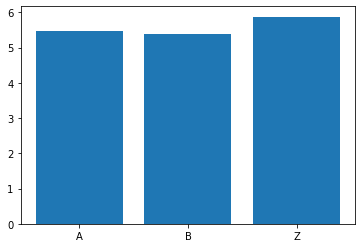

In [26]:
# We need to define a figure and a Axes:
fig1, ax = plt.subplots() # It always starts like this
# Define the kind of visualization you want, here it's a bar plot
ax.bar(x= df_barplot['citric_cat'], height=df_barplot['quality'])
plt.show()

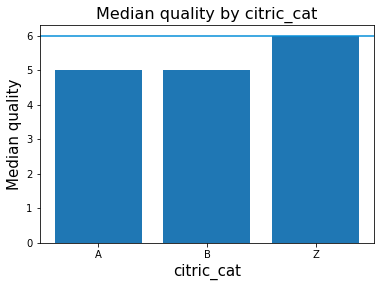

In [36]:
# Let's add a horizontal line showing the median quality off all wines
med_quality = df['quality'].median()

fig1, ax = plt.subplots()
ax.bar(x= df_barplot['citric_cat'], height=df_barplot['quality'])
ax.axhline(y=med_quality, color='#058ED9')
ax.set_title('Median quality by citric_cat', loc='center', fontsize=16)
ax.set_ylabel('Median quality', fontsize = 15)
ax.set_xlabel('citric_cat', fontsize=15)
plt.show()

In [20]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,citric_cat,Y,fixed_acidity_cat,volatile_acidity_cat,pH2,acidity_other,date,time_diff,day_diff,Random_Normal_feature1,Random_Normal_feature2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,A,0,0,0,NaN,3.51,2021-01-06 14:38:36,278 days 09:21:24,278.389861,-1.631267,1.407202
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,A,0,0,0,3.20,NaN,2021-02-07 08:11:30,246 days 15:48:30,246.658681,1.047653,1.086529
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,A,0,0,0,3.26,3.26,2021-06-27 12:25:26,106 days 11:34:34,106.482338,-0.226178,0.852965
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Z,0,1,1,3.16,NaN,2021-06-16 05:25:38,117 days 18:34:22,117.773866,-0.930432,0.634562
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,A,0,0,0,3.51,3.51,2021-01-20 10:10:16,264 days 13:49:44,264.576204,-0.047275,1.816503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,9.8,0.34,0.39,1.4,0.066,3.0,7.0,0.99470,3.19,0.55,11.4,7,Z,1,1,1,3.19,3.19,2021-02-24 11:37:07,229 days 12:22:53,229.515891,1.320290,0.899144
1745,7.3,0.67,0.02,2.2,0.072,31.0,92.0,0.99566,3.32,0.68,11.1,6,A,0,0,0,3.32,NaN,2021-06-11 16:38:31,122 days 07:21:29,122.306586,0.311190,0.637923
1746,8.3,0.42,0.38,2.5,0.094,24.0,60.0,0.99790,3.31,0.70,10.8,6,Z,0,1,0,3.31,3.31,2021-06-03 16:47:05,130 days 07:12:55,130.300637,-2.410861,0.235571
1747,11.9,0.39,0.69,2.8,0.095,17.0,35.0,0.99940,3.10,0.61,10.8,6,Z,0,1,1,3.10,NaN,2021-03-02 14:50:52,223 days 09:09:08,223.381343,-1.779215,1.310266


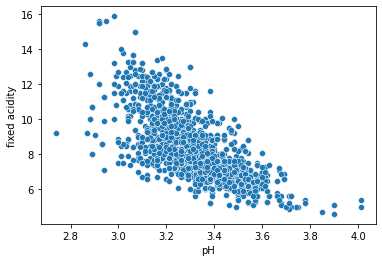

In [ ]:
sns.scatterplot(data=df, x="pH", y="fixed acidity")